# Bernoulli Chess Trial
Um estudo de probabilidades em experimentos repetidos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.special import comb
%matplotlib inline

In [2]:
# Constantes
p = 3/8
q = 1-p
N = 10

In [3]:
# Dataframe para plotagem dos gráficos
df_probs = pd.DataFrame()

Cálculo de $P_{preta}(frente)$ e $P_{branca}(frente)$

In [4]:
pfp = 0
pbp = 0

for k in range(1, N+1):
    if (k == 1):
        pfp = (comb(k,k) * (p**(k)))
        pbp = 1
        df_probs.loc[k, 'lances'] = k
        df_probs.loc[k, 'prob_preta'] = pfp
        df_probs.loc[k, 'prob_branca'] = pbp
    elif (k == 2):
        pbp = (comb(k-1,k-1) * (p**(k-1))) 
        pfp = (comb(k,k) * (p**k)) + (comb(k-1, k-1) * (p**(k-1)))
        df_probs.loc[k, 'lances'] = k
        df_probs.loc[k, 'prob_preta'] = pfp
        df_probs.loc[k, 'prob_branca'] = pbp
    else:
        pbp = (comb(k-1,k-1) * (p**(k-1))) + (comb(k-2, k-2) * (p**(k-2)))
        pfp = (comb(k,k) * (p**k)) + (comb(k-1, k-1) * (p**(k-1)))
        df_probs.loc[k, 'lances'] = k
        df_probs.loc[k, 'prob_preta'] = pfp
        df_probs.loc[k, 'prob_branca'] = pbp


In [5]:
df_probs['total'] = df_probs.prob_preta + df_probs.prob_branca

In [6]:
df_probs

,lances,prob_preta,prob_branca,total
1,1.0,0.375000,1.000000,1.375000
2,2.0,0.515625,0.375000,0.890625
3,3.0,0.193359,0.515625,0.708984
4,4.0,0.072510,0.193359,0.265869
5,5.0,0.027191,0.072510,0.099701
6,6.0,0.010197,0.027191,0.037388
7,7.0,0.003824,0.010197,0.014020
8,8.0,0.001434,0.003824,0.005258
9,9.0,0.000538,0.001434,0.001972
10,10.0,0.000202,0.000538,0.000739


Gráfico

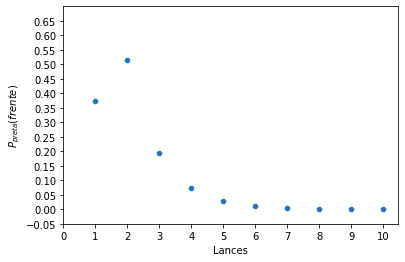

In [22]:
g_preta = sns.scatterplot(
    x = 'lances',
    y = 'prob_preta',
    data = df_probs
)

plt.ylim(0,0.7)
plt.xlabel("Lances")
plt.ylabel('$P_{preta}(frente)$')
plt.yticks(np.arange(-0.05,0.7,0.05))
plt.xticks(np.arange(0,11,1))
plt.show(g_preta)

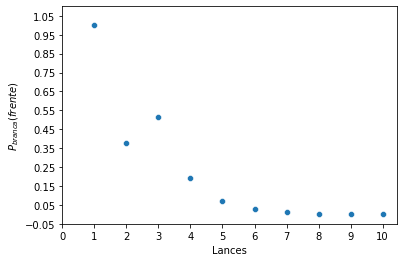

In [23]:
g_branca = sns.scatterplot(
    x = 'lances',
    y = 'prob_branca',
    data = df_probs
)

plt.ylim(0,1.1)
plt.xlabel("Lances")
plt.ylabel('$P_{branca}(frente)$')
plt.yticks(np.arange(-0.05,1.1,0.1))
plt.xticks(np.arange(0,11,1))
plt.show(g_branca)

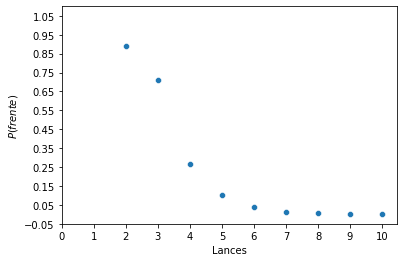

In [24]:
g_total = sns.scatterplot(
    x = 'lances',
    y = 'total',
    data = df_probs
)

plt.ylim(0,1.1)
plt.xlabel("Lances")
plt.ylabel('$P(frente)$')
plt.yticks(np.arange(-0.05,1.1,0.1))
plt.xticks(np.arange(0,11,1))
plt.show(g_total)